## Predicting survivenec of the Breast Cancer 

Breast cancer is a common and serious health concern affecting many individuals, particularly women. Analyzing the breast cancer dataset is crucial for early detection and understanding risk factors, as it can help improve diagnostic accuracy, treatment strategies, and ultimately save lives.


In [2]:
## import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

##import libraries for ANN

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.models import Sequential

In [3]:
## warning 
import warnings 
warnings.filterwarnings('ignore')

In [4]:
## load the dataset
bcan1 = pd.read_csv('Breast_Cancer.csv')
bcan1

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,41,White,Married,T3,N3,IIIC,Poorly differentiated,3,Regional,140,Positive,Positive,41,15,51,Dead
1,47,White,Married,T3,N2,IIIA,Well differentiated,1,Regional,140,Positive,Positive,23,7,64,Alive
2,49,White,Married,T3,N1,IIIA,Moderately differentiated,2,Regional,140,Positive,Positive,14,2,48,Alive
3,60,White,Divorced,T3,N2,IIIA,Moderately differentiated,2,Regional,140,Positive,Positive,21,5,57,Alive
4,63,White,Married,T4,N2,IIIB,Moderately differentiated,2,Regional,140,Positive,Positive,9,8,89,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,55,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,1,Positive,Negative,18,1,87,Alive
4020,55,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,1,Positive,Positive,31,1,59,Alive
4021,58,White,Married,T1,N3,IIIC,Poorly differentiated,3,Regional,1,Positive,Positive,22,22,82,Dead
4022,61,Black,Married,T1,N1,IIA,Moderately differentiated,2,Regional,1,Positive,Positive,4,1,51,Alive


In [5]:
##checking if there is any blank
bcan1.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [6]:
# Checking if there is any duplicates
bcan = bcan1.drop_duplicates()
bcan

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,41,White,Married,T3,N3,IIIC,Poorly differentiated,3,Regional,140,Positive,Positive,41,15,51,Dead
1,47,White,Married,T3,N2,IIIA,Well differentiated,1,Regional,140,Positive,Positive,23,7,64,Alive
2,49,White,Married,T3,N1,IIIA,Moderately differentiated,2,Regional,140,Positive,Positive,14,2,48,Alive
3,60,White,Divorced,T3,N2,IIIA,Moderately differentiated,2,Regional,140,Positive,Positive,21,5,57,Alive
4,63,White,Married,T4,N2,IIIB,Moderately differentiated,2,Regional,140,Positive,Positive,9,8,89,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,55,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,1,Positive,Negative,18,1,87,Alive
4020,55,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,1,Positive,Positive,31,1,59,Alive
4021,58,White,Married,T1,N3,IIIC,Poorly differentiated,3,Regional,1,Positive,Positive,22,22,82,Dead
4022,61,Black,Married,T1,N1,IIA,Moderately differentiated,2,Regional,1,Positive,Positive,4,1,51,Alive


There is no blank in the dataset but there was one duplicated row and we removed it.


In [7]:
bcan.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000
mean,53.969923,30.477007,14.358439,4.158837,71.301765
std,8.963118,21.121253,8.100241,5.109724,22.923009
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [8]:
print(bcan.columns)

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')


## There is another way to check the data, checking blanks, objects and numberss...
Here we can have the informations of our dataset


In [9]:
def check(bcan):
    # Creating an empty list to store columns information
    columns_info = []

    # Iterate through columns
    for col in bcan.columns:
        # Extract column information
        dtypes = bcan[col].dtypes
        nunique = bcan[col].nunique()
        sum_null = bcan[col].isnull().sum()

        # Append the information to the list
        columns_info.append([col, dtypes, nunique, sum_null])

    # Create a DataFrame from the list
    bcan_check = pd.DataFrame(columns_info, columns=['Column', 'Dtype', 'Nunique', 'Sum_Null'])

    return bcan_check

result = check(bcan)
print(result)

                    Column   Dtype  Nunique  Sum_Null
0                      Age   int64       40         0
1                     Race  object        3         0
2           Marital Status  object        5         0
3                 T Stage   object        4         0
4                  N Stage  object        3         0
5                6th Stage  object        5         0
6            differentiate  object        4         0
7                    Grade  object        4         0
8                  A Stage  object        2         0
9               Tumor Size   int64      110         0
10         Estrogen Status  object        2         0
11     Progesterone Status  object        2         0
12  Regional Node Examined   int64       54         0
13   Reginol Node Positive   int64       38         0
14         Survival Months   int64      107         0
15                  Status  object        2         0


# Encoding for some columns:
A number of columns are in categorical so we need to convert them to numerical
"Race", "Marital Status","T Stage","N Stage", "6th Stage", "differentiate Grade", "A Stage", "Tumor Size","Estrogen Status","Progesterone Status","Status"


#List of categorical columns to label encode
categorical_columns = ["Race", "Marital Status", "T Stage", "N Stage", "6th Stage", "differentiate Grade", "A Stage", "Tumor Size", "Estrogen Status", "Progesterone Status", "Status"]

#Initialize a LabelEncoder for each column
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    bcan[col] = label_encoders[col].fit_transform(bcan[col])

bcan.head()


In [10]:
####Exploratory data analysis---Plotting HEATMAP---Correlation data
# Create a heatmap
## Here I want to see the corr-mat in table as it is  little clearer for the numbers
corr_mat = bcan.corr(numeric_only=True)
pd.options.display.float_format = '{:.2f}'.format
corr_mat

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
Age,1.00,-0.08,-0.03,0.01,-0.01
Tumor Size,-0.08,1.00,0.10,0.24,-0.09
Regional Node Examined,-0.03,0.10,1.00,0.41,-0.02
Reginol Node Positive,0.01,0.24,0.41,1.00,-0.14
Survival Months,-0.01,-0.09,-0.02,-0.14,1.00


# Making the Model

In [11]:
print(corr_mat)


                         Age  Tumor Size  Regional Node Examined  \
Age                     1.00       -0.08                   -0.03   
Tumor Size             -0.08        1.00                    0.10   
Regional Node Examined -0.03        0.10                    1.00   
Reginol Node Positive   0.01        0.24                    0.41   
Survival Months        -0.01       -0.09                   -0.02   

                        Reginol Node Positive  Survival Months  
Age                                      0.01            -0.01  
Tumor Size                               0.24            -0.09  
Regional Node Examined                   0.41            -0.02  
Reginol Node Positive                    1.00            -0.14  
Survival Months                         -0.14             1.00  


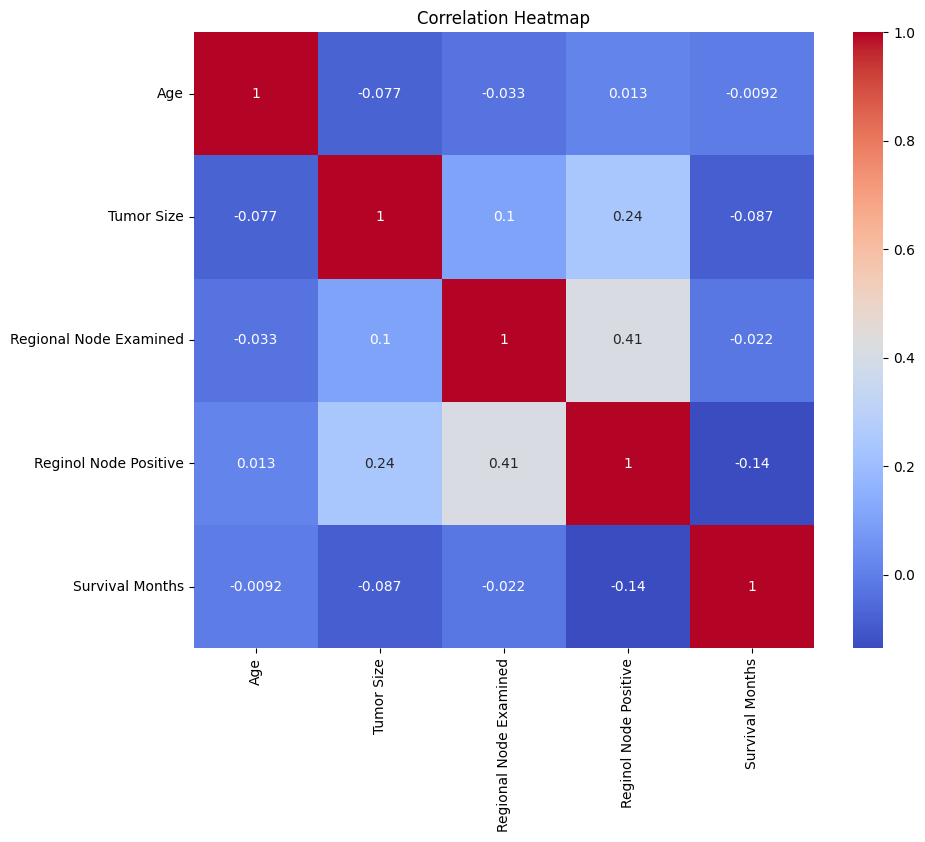

In [12]:
## Plot the heatmap

corr_mat = bcan.corr(numeric_only = True)
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, cmap=sns.color_palette("coolwarm", as_cmap=True))
plt.title("Correlation Heatmap")

plt.show()

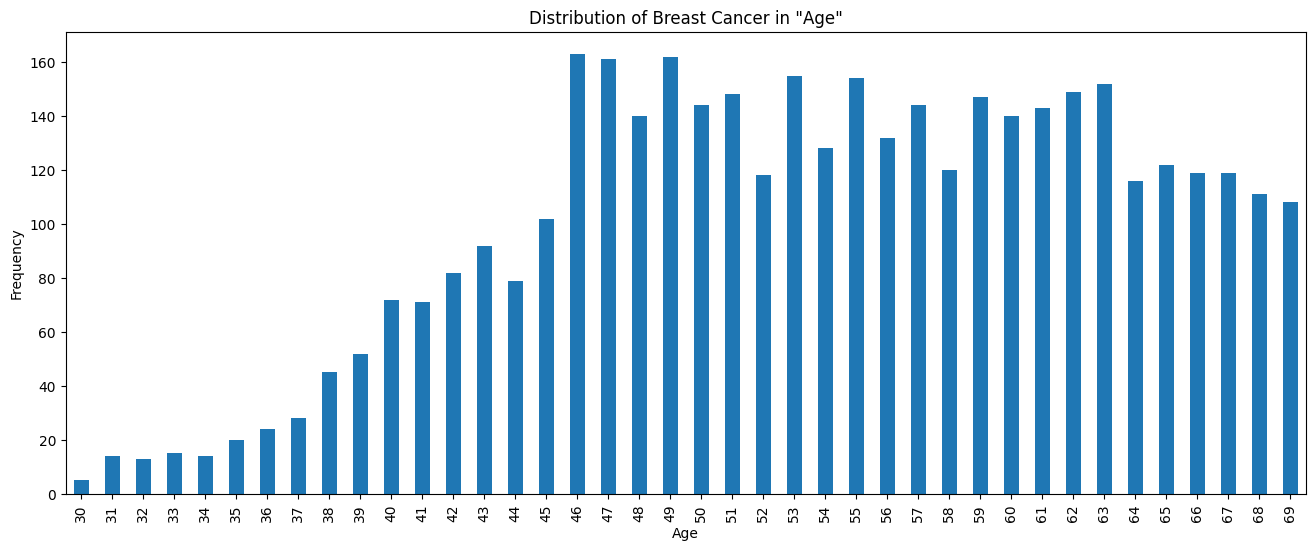

In [13]:
# Visualizing 
# Sort the 'Age' values in ascending order   ##Using "sort_index()" we put the age values in acsending order 

plt.figure(figsize=(16, 6))
Age_counts = bcan['Age'].value_counts().sort_index()
Age_counts.plot(kind='bar')
plt.title('Distribution of Breast Cancer in "Age"')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

@The plot illustrates the likelihood of developing Bcan (cancer) increasing significantly from the age of 42 and above.

In certain age ranges, such as between 46 to 65, the probability of developing Bcan exceeds 70%.

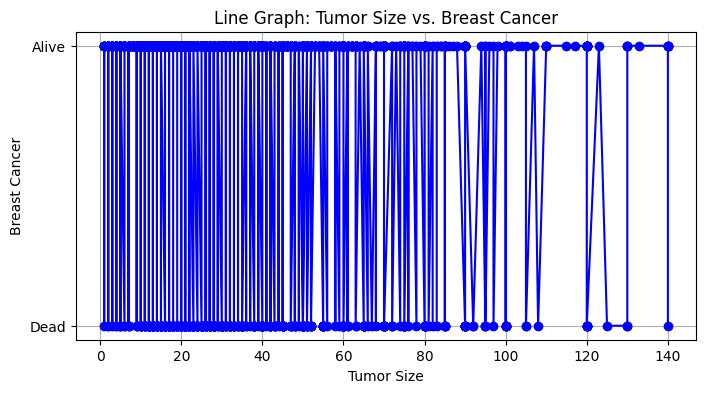

In [14]:
# Assuming 'Tumor Size' is on the x-axis and 'Breast Cancer' is on the y-axis
x = bcan['Tumor Size']
y = bcan['Status']

plt.figure(figsize=(8, 4))
plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.title('Line Graph: Tumor Size vs. Breast Cancer')
plt.xlabel('Tumor Size')
plt.ylabel('Breast Cancer')
plt.grid(True)
plt.show()

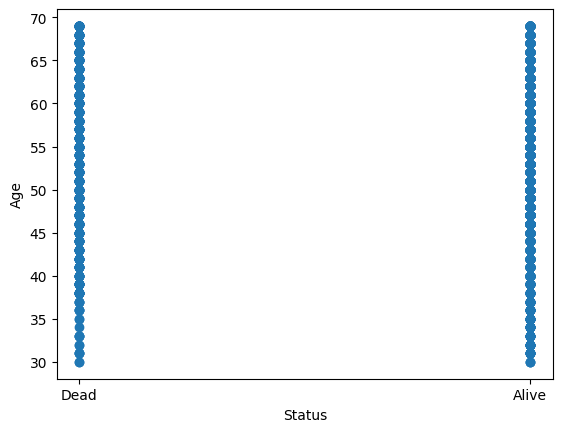

In [15]:
# bcan data --scatter plot to see the relationship 
plt.scatter(bcan['Status'], bcan['Age'])
## label the axes
plt.xlabel('Status')
plt.ylabel('Age')
plt.show()

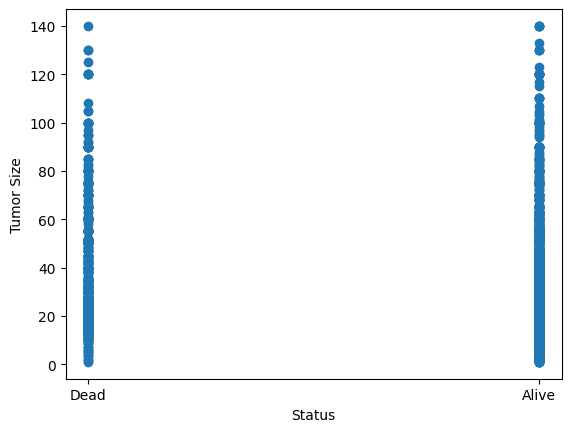

In [16]:
# bcan data --scatter plot to see the relationship 
plt.scatter(bcan['Status'], bcan['Tumor Size'])
## label the axes
plt.xlabel('Status')
plt.ylabel('Tumor Size')
plt.show()

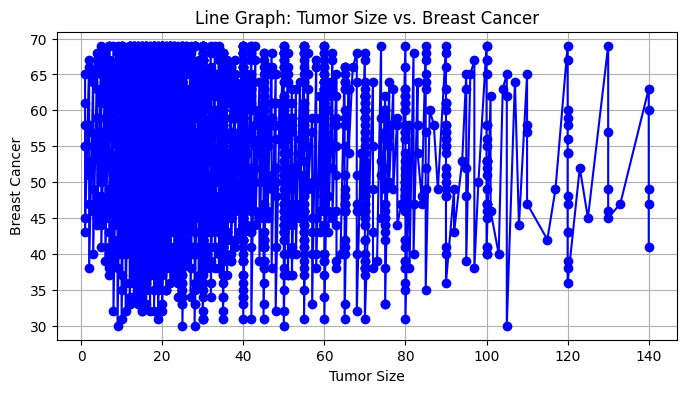

In [17]:
# Assuming 'Tumor Size' is on the x-axis and 'Breast Cancer' is on the y-axis
x = bcan['Tumor Size']
y = bcan['Age']

plt.figure(figsize=(8, 4))
plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.title('Line Graph: Tumor Size vs. Breast Cancer')
plt.xlabel('Tumor Size')
plt.ylabel('Breast Cancer')
plt.grid(True)
plt.show()

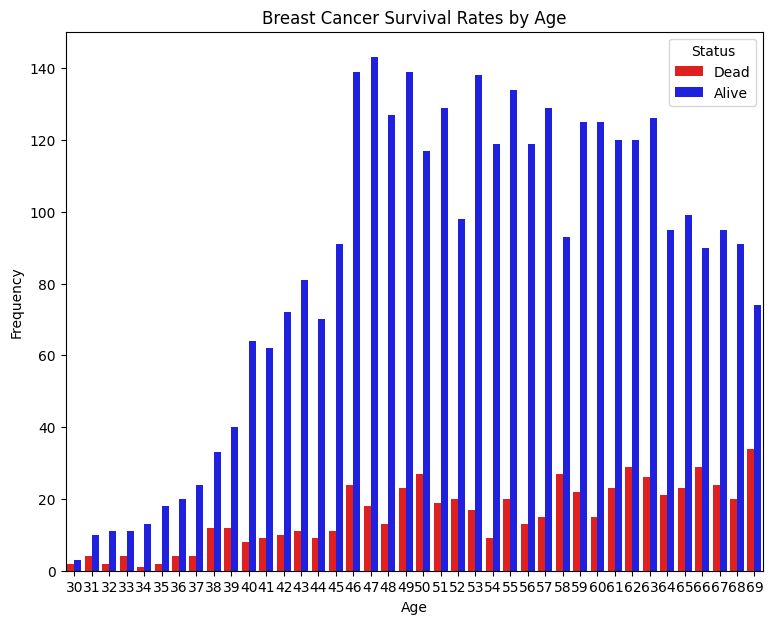

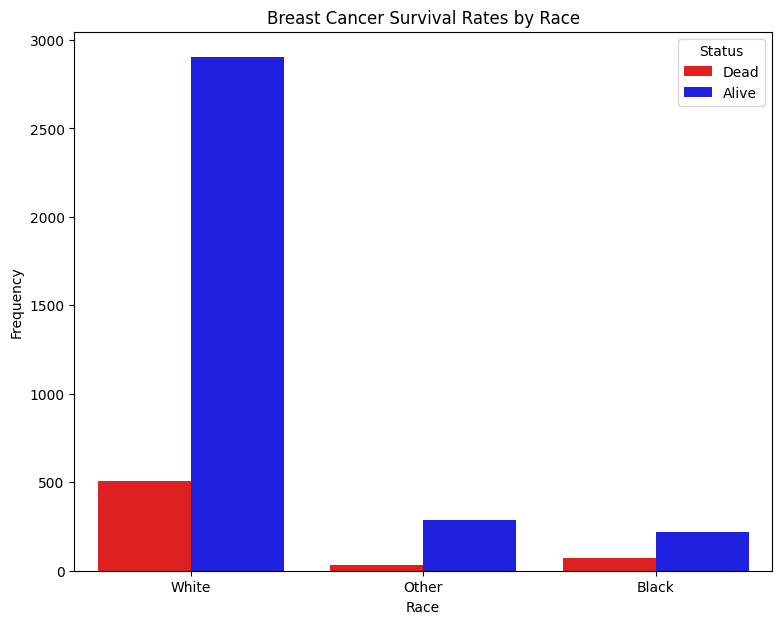

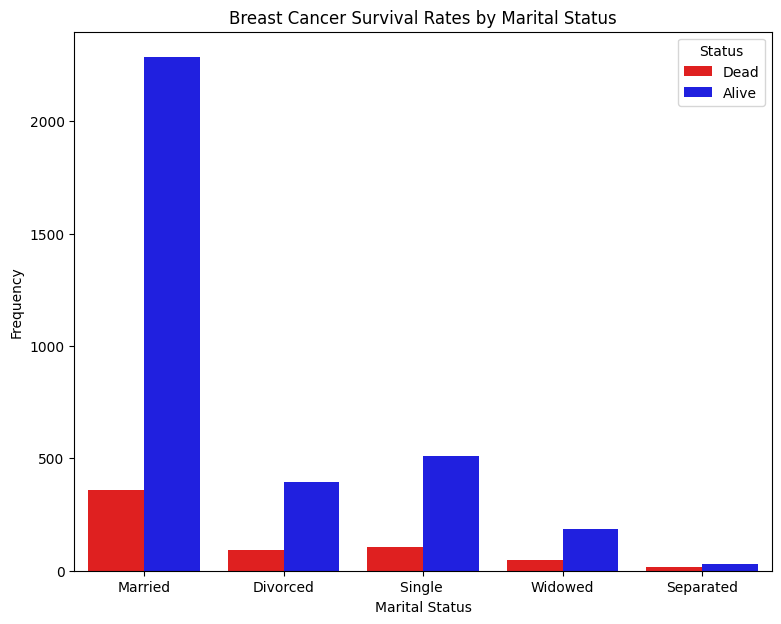

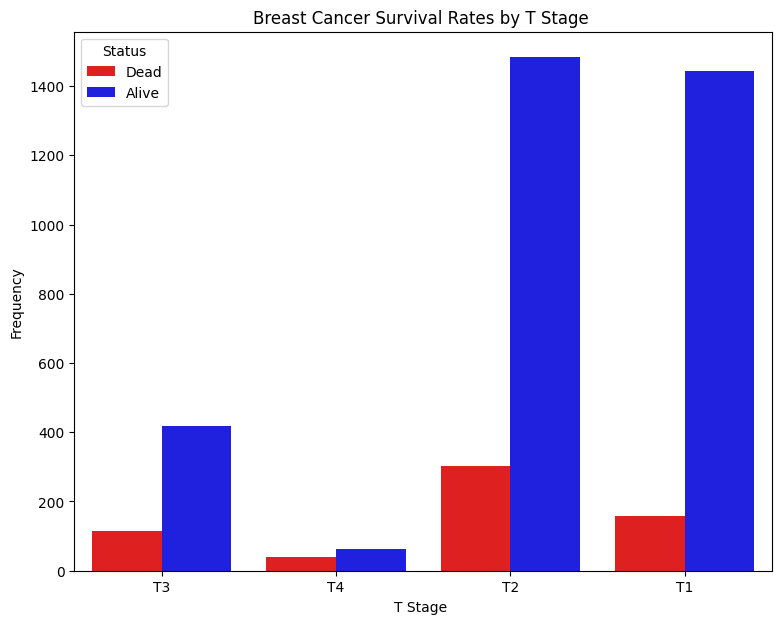

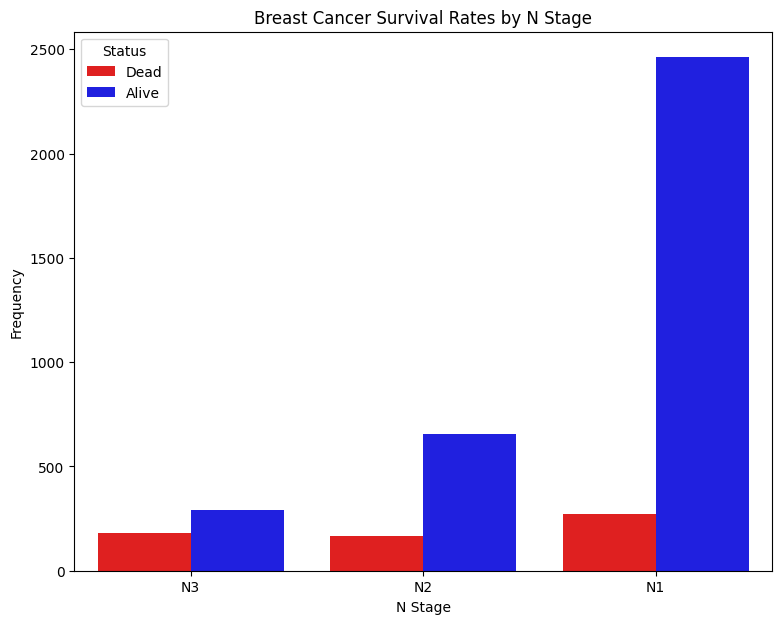

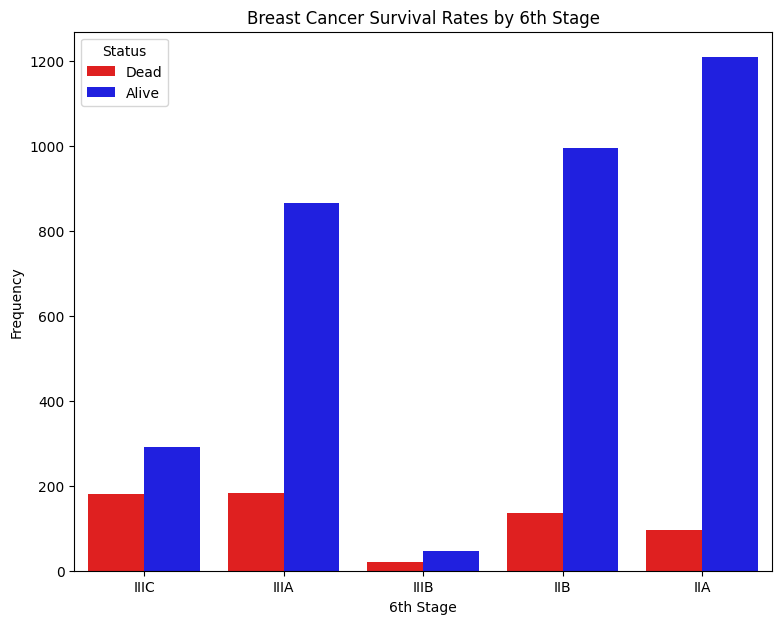

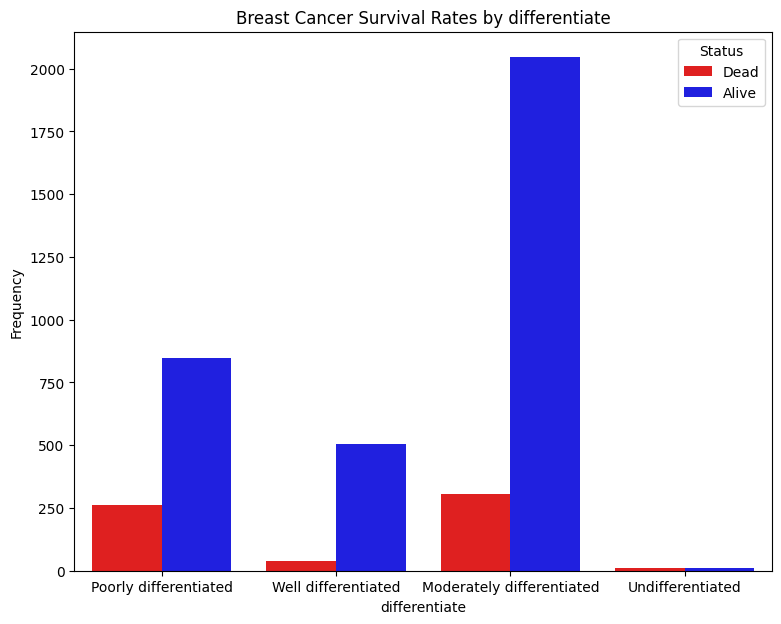

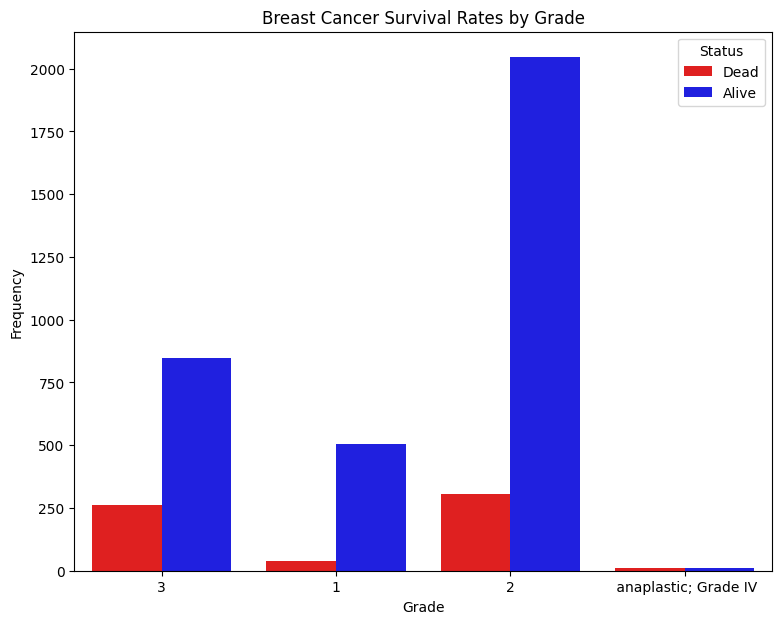

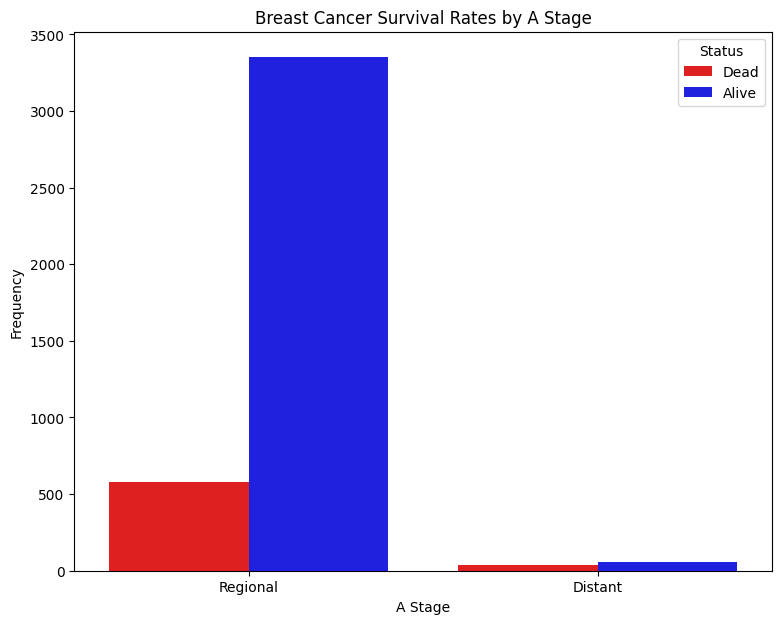

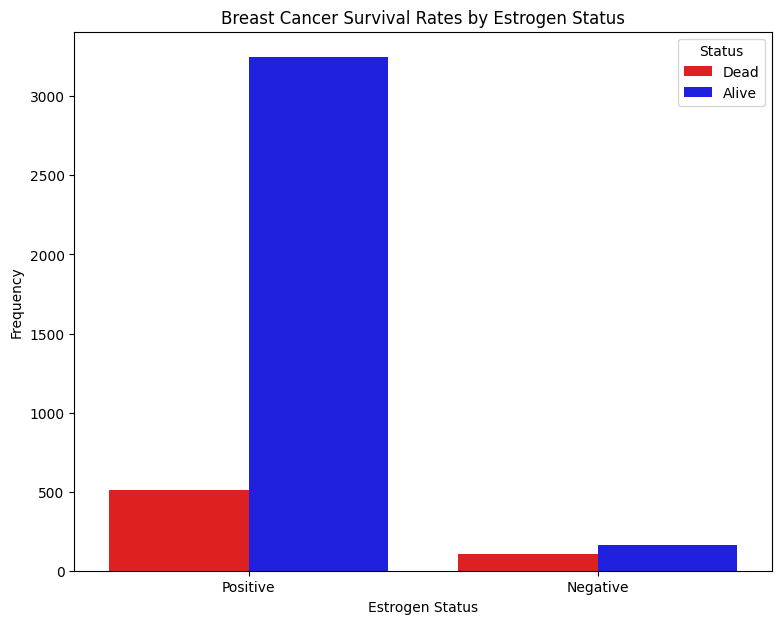

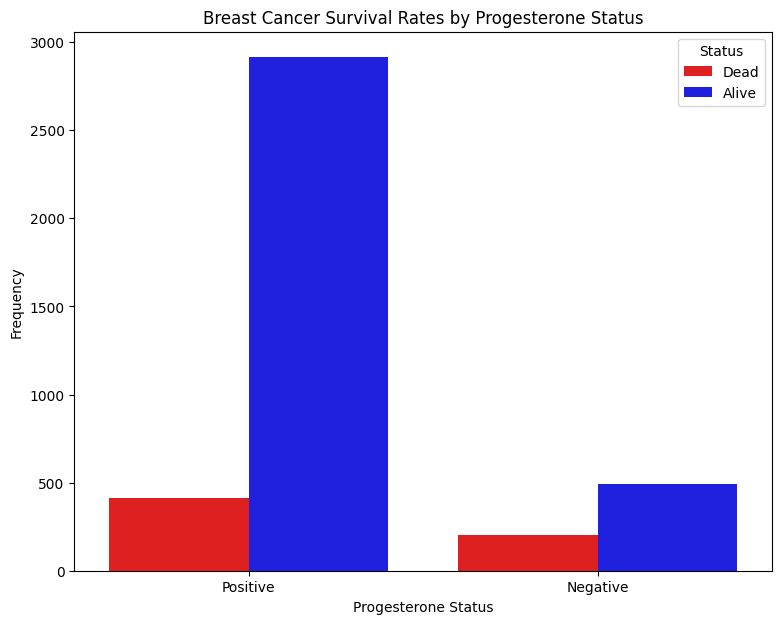

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_visualize = ['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Estrogen Status',
       'Progesterone Status']

for col in columns_to_visualize:
    plt.figure(figsize=(9,7))
    sns.countplot(x=col, hue='Status', data=bcan, palette={'Alive': 'blue', 'Dead': 'red'})
    plt.title(f'Breast Cancer Survival Rates by {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend(title='Status')
    plt.xticks(rotation=0)
    plt.show()

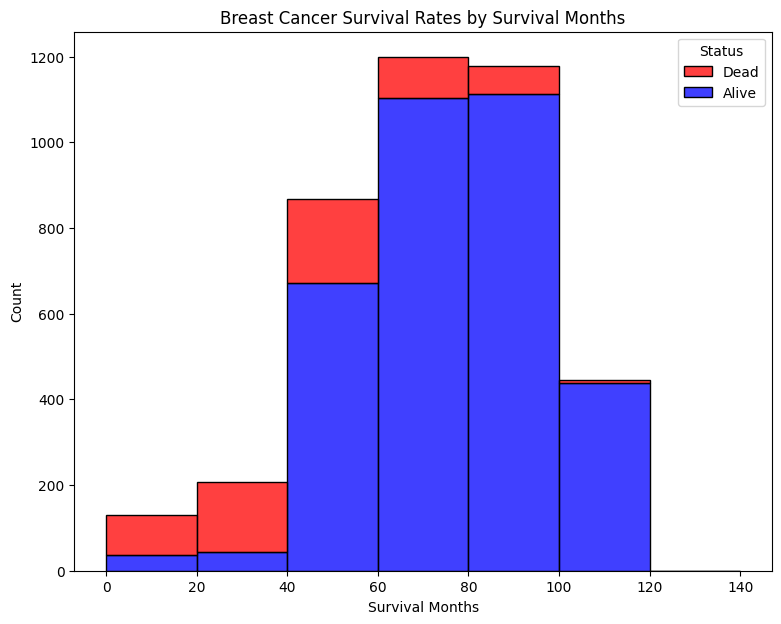

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming columns_to_visualize is a list of column names
columns_to_visualize = ["Survival Months"]

for col in columns_to_visualize:
    plt.figure(figsize=(9, 7))
    
    # Create a histogram using plt.hist with specified bins
    sns.histplot(x=col, hue='Status', data=bcan, palette={'Alive': 'blue', 'Dead': 'red'}, bins=range(0, 150, 20), multiple='stack')
    
    plt.title(f'Breast Cancer Survival Rates by {col}')
    plt.xlabel(col)
    plt.show()


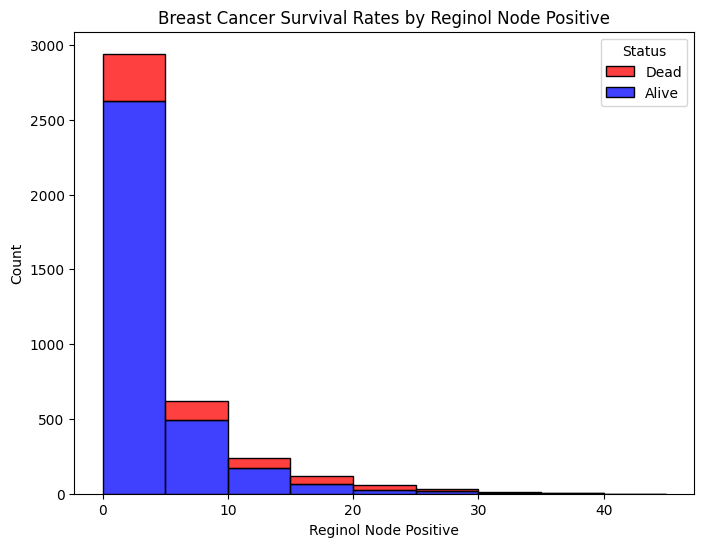

In [20]:

# Assuming columns_to_visualize is a list of column names
columns_to_visualize = ["Reginol Node Positive"]

for col in columns_to_visualize:
    plt.figure(figsize=(8, 6))
    
    # Create a histogram using plt.hist with specified bins
    sns.histplot(x=col, hue='Status', data=bcan, palette={'Alive': 'blue', 'Dead': 'red'}, bins=range(0, 50, 5), multiple='stack')
    
    plt.title(f'Breast Cancer Survival Rates by {col}')
    plt.xlabel(col)
    plt.show()

When a cancer is described as "regional node positive," it means that cancer cells have been detected in the nearby lymph nodes. The status of regional lymph nodes is an important factor in staging cancer and determining the extent of its spread. Lymph node involvement is often associated with a more advanced stage of cancer.
The number indicates the quantity of lymph nodes involved, and this information is typically obtained through surgical procedures or imaging studies.

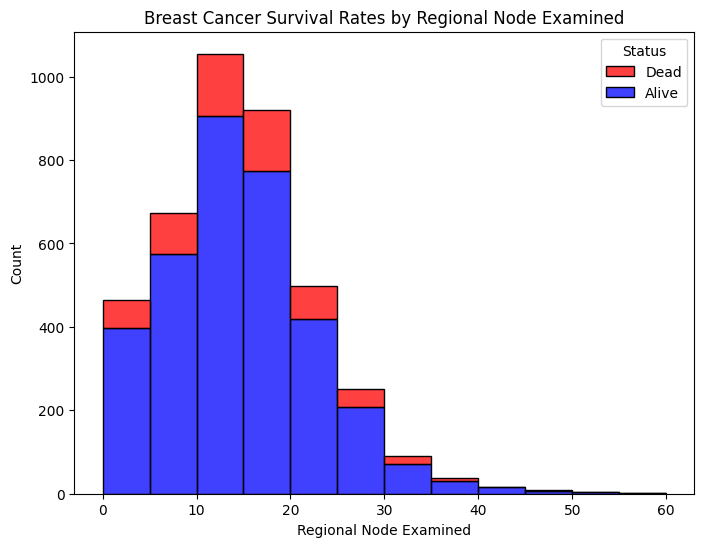

In [21]:
# Assuming columns_to_visualize is a list of column names
columns_to_visualize = ["Regional Node Examined"]

for col in columns_to_visualize:
    plt.figure(figsize=(8, 6))
    
    # Create a histogram using plt.hist with specified bins
    sns.histplot(x=col, hue='Status', data=bcan, palette={'Alive': 'blue', 'Dead': 'red'}, bins=range(0, 65, 5), multiple='stack')
    
    plt.title(f'Breast Cancer Survival Rates by {col}')
    plt.xlabel(col)
    plt.show()

Regional node examined:

 It refers to the number of regional lymph nodes that have been examined or removed and analyzed during a medical procedure, often as part of cancer staging or diagnosis. 
 In the histogram above, the highest frequency or count of individuals falls into the ranges of 10-15 and 15-20 regional nodes examined, and correspondingly, the survival chance is also higher compared to patients in the range above 20. The number of people diagnosed with less than 5 nodes was significantly lower, suggesting a lower chance of survival for this group as well. 

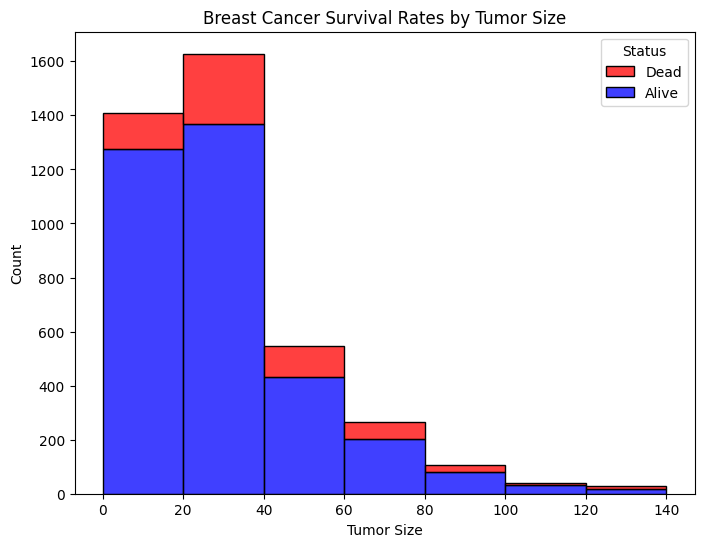

In [22]:


# Assuming columns_to_visualize is a list of column names
columns_to_visualize = ["Tumor Size"]

for col in columns_to_visualize:
    plt.figure(figsize=(8, 6))
    
    # Create a histogram using plt.hist with specified bins
    sns.histplot(x=col, hue='Status', data=bcan, palette={'Alive': 'blue', 'Dead': 'red'}, bins=range(0, 150, 20), multiple='stack')
    
    plt.title(f'Breast Cancer Survival Rates by {col}')
    plt.xlabel(col)
    plt.show()


~~Tumor Size:

The number of people diagnosed with cancer and a tumor size above 40 is lower compared to those with a tumor size less than 40. Additionally, the survival chance for the former group is lower than that for patients with a smaller tumor size.

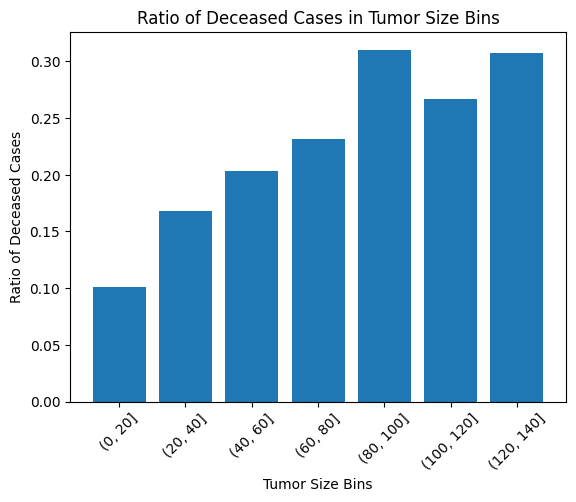

In [23]:
# Assuming 'bcan' is our DataFrame with 'Tumor Size' and 'Status' columns
# Create the histogram with 7 bins of 20
bins = np.arange(0, 161, 20)  # Adjust the range if needed
bcan['Tumor Size Bin'] = pd.cut(bcan['Tumor Size'], bins=bins)

# Calculate counts of deceased cases in each bin
deads_per_bin = bcan[bcan['Status'] == 'Dead'].groupby('Tumor Size Bin').size()

# Calculate total counts in each bin
total_counts_per_bin = bcan.groupby('Tumor Size Bin').size()

# Calculate the ratio or percentage of deceased cases in each bin
ratio_deads_per_bin = deads_per_bin / total_counts_per_bin

# Plot the histogram
plt.bar(deads_per_bin.index.astype(str), ratio_deads_per_bin)
plt.xlabel('Tumor Size Bins')
plt.ylabel('Ratio of Deceased Cases')
plt.title('Ratio of Deceased Cases in Tumor Size Bins')
plt.xticks(rotation=45)
plt.show()

~~Tumor Size:

The number of people diagnosed with cancer and a tumor size above 40 is lower compared to those with a tumor size less than 40. Additionally, the survival chance for the former group is lower than that for patients with a smaller tumor size.

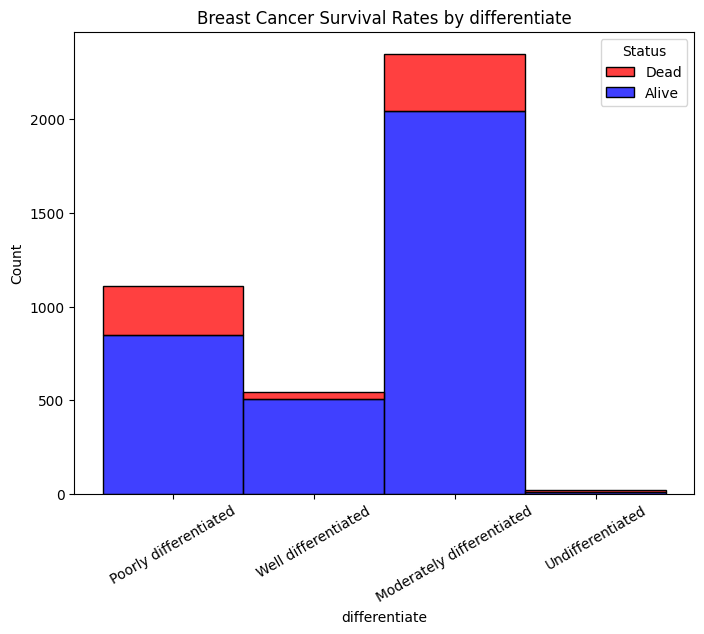

In [24]:

# Assuming columns_to_visualize is differentiate
columns_to_visualize = ["differentiate"]

for col in columns_to_visualize:
    plt.figure(figsize=(8, 6))
    
    # Create a histogram using plt.hist with specified bins
    sns.histplot(x=col, hue='Status', data=bcan, palette={'Alive': 'blue', 'Dead': 'red'}, bins=range(0, 150, 20), multiple='stack')
    
    plt.title(f'Breast Cancer Survival Rates by {col}')
    plt.xlabel(col)
    plt.xticks(rotation=30)
    plt.show()


#Anlysing the differentiate of cells:

Well-Differentiated: Resembles normal cells, less aggressive, favorable prognosis.
Moderately Differentiated: Some resemblance, intermediate behavior.
Poorly Differentiated (Undifferentiated): Little resemblance, more aggressive, poorer prognosis.

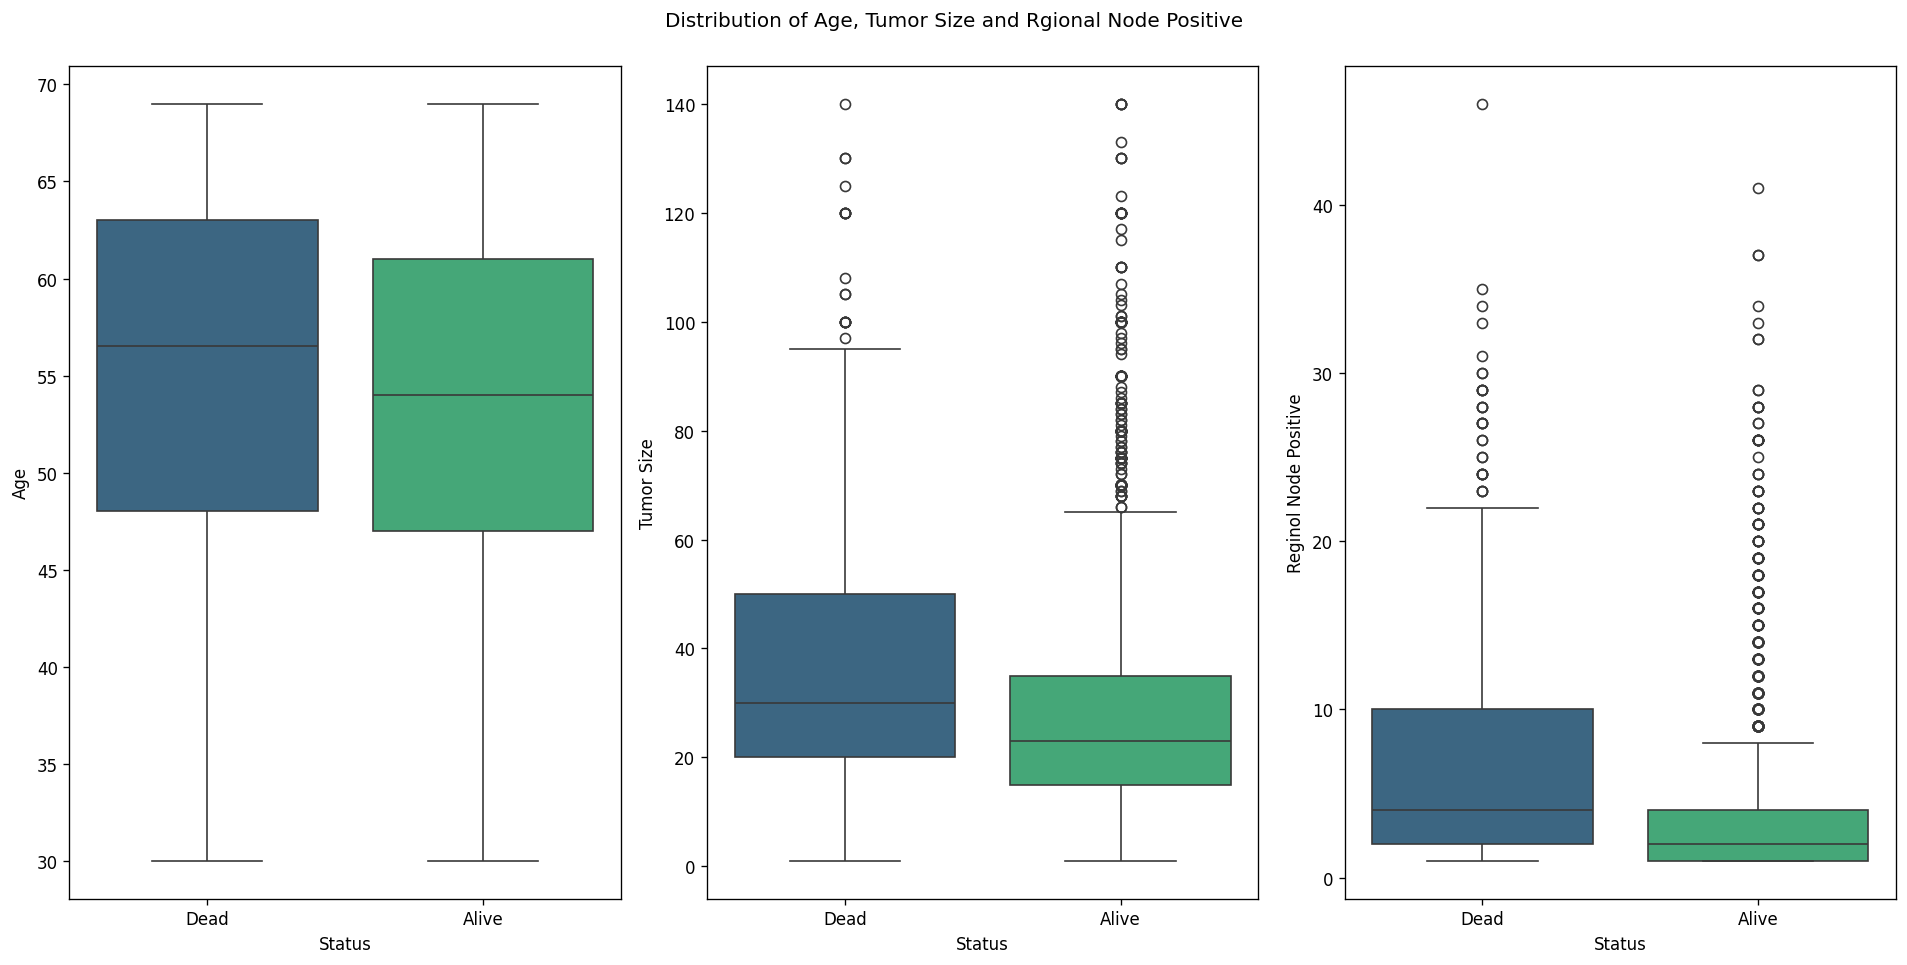

In [25]:
## Box Plot to visualizing "Age", "Tumor Size", Regional Node Positive""Backed up"
box_cols = ['Age', 'Tumor Size', 'Reginol Node Positive']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,8), dpi=120)
fig.suptitle('Distribution of Age, Tumor Size and Rgional Node Positive', y = 1);
for col, ax in zip(box_cols, axes.ravel()):
    sns.boxplot(bcan, x='Status', y=col, palette='viridis', ax=ax)
plt.tight_layout()


## Need to think about the box plot and get some conclusions


Text(0.5, 1.0, 'Tumor Size vs Estrogen Status')

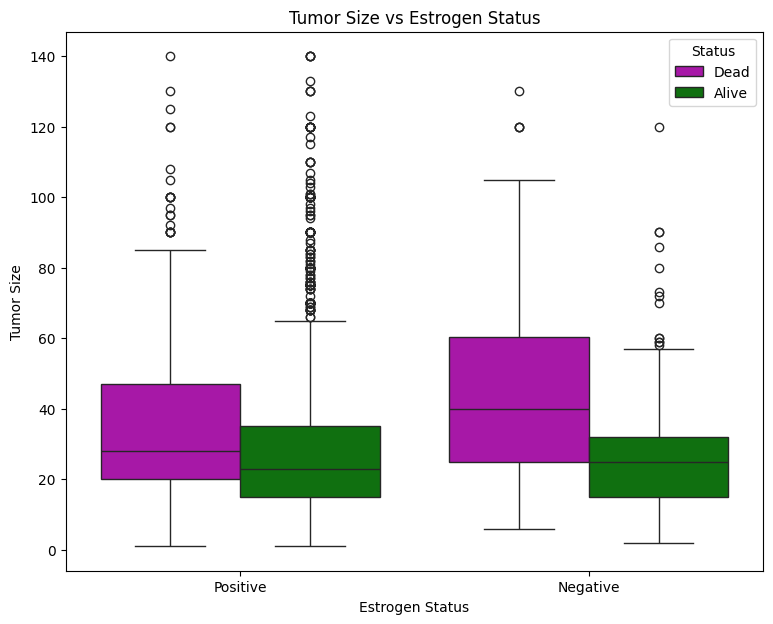

In [26]:
plt.figure(figsize=(9,7))
sns.boxplot(x="Estrogen Status", y="Tumor Size",
            hue="Status", palette=["m", "g"],
            data=bcan)
plt.title("Tumor Size vs Estrogen Status")

Text(0.5, 1.0, 'Tumor Size vs Grade')

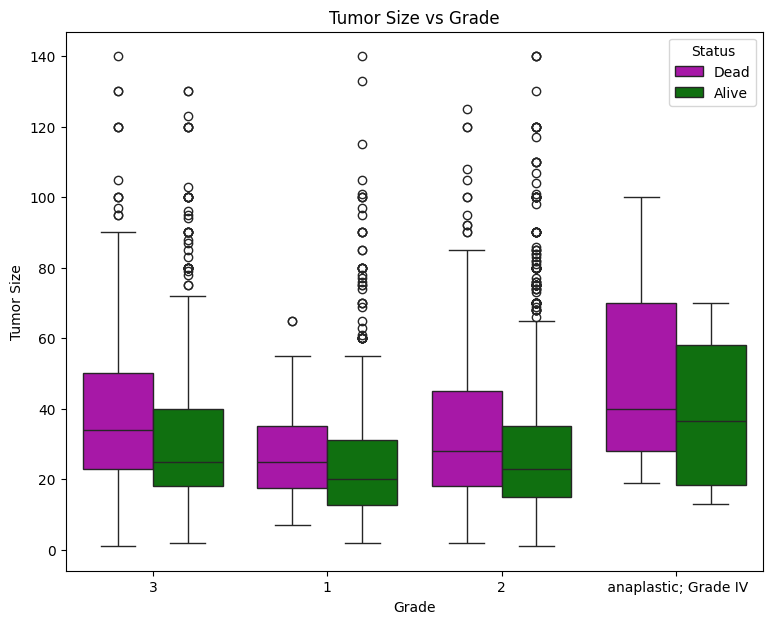

In [27]:
## Box plot of Tumor size and Grades, to see the variety and outliers

plt.figure(figsize=(9,7))
sns.boxplot(x="Grade", y="Tumor Size",
            hue="Status", palette=["m", "g"],
            data=bcan)
plt.title("Tumor Size vs Grade")

# Box plot of Grade and Tumor size
We see Grade Four tumors tend to have larger tumor sizes and more variation compared to Grade One tumors.
Grade One tumors have smaller tumor sizes and smaller variation.
In all grades, there is an observation that the number of deaths is higher in cases with larger tumor sizes.
The pink box, representing dead, corresponds to higher tumor sizes in the boxplot.

pip install plotly
pip install --upgrade nbformat
pip install --upgrade nbformat


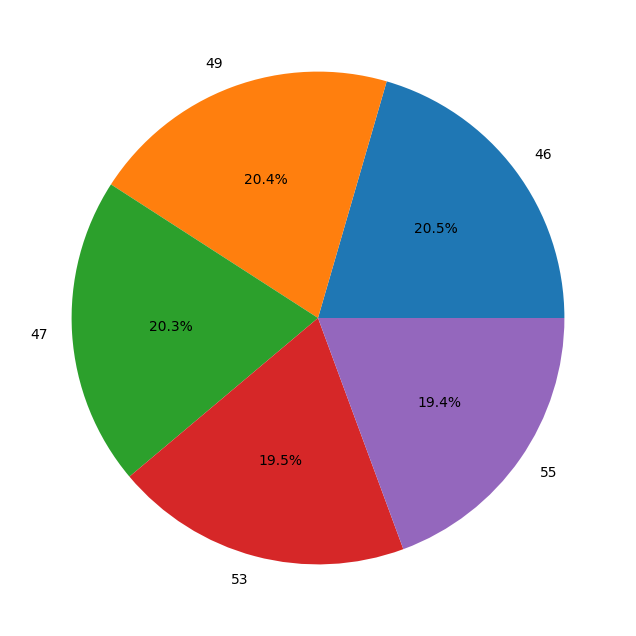

In [ ]:
# Group by the selected features such as Age, Race, and Tumor Size

#this code is generating a pie chart to visualize the distribution of the top 5 combinations of 'Estrogen Status', 
# 'Progesterone Status', and 'Tumor Size' based on the counts in the 'Status' column of the DataFrame bcan.
top_5_p = bcan.groupby(['Age']).count()['Status'].nlargest(5)

# Create a pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(top_5_p, labels=top_5_p.index, autopct='%1.1f%%')

plt.show()


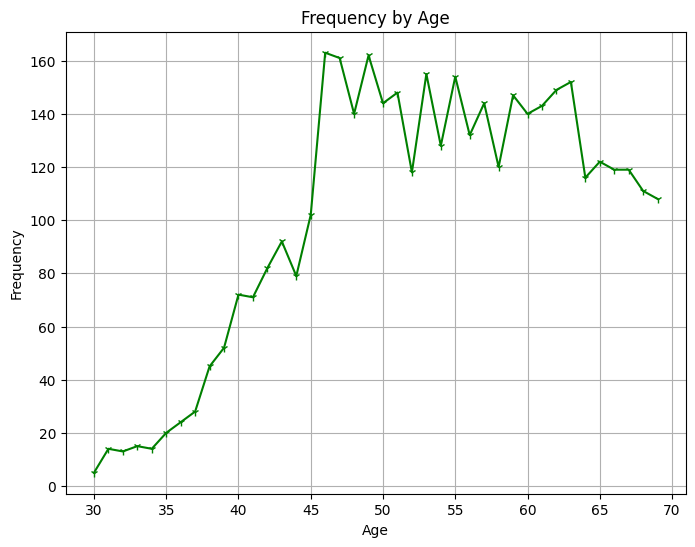

In [36]:
# Magnitude Frequency
Age = bcan['Age'].value_counts().sort_index()

# Line chart to visualising by magnitude
plt.figure(figsize=(8, 6))
plt.plot(Age.index, Age.values, marker='1', linestyle='-', color='green')
plt.title('Frequency by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(True)  # Add grid lines for better readability
plt.show()